In [ ]:
#Import the required packages.

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np  

In [2]:
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.3.4
Seaborn version:  0.11.2
Matplotlib version:  3.4.3


In [ ]:
#Read the data from the file data.csv

In [2]:
df = pd.read_csv("data.csv")

In [ ]:
#Check few data from the beginning of data frame

In [4]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
#Check few data from the end of data frame

In [5]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [6]:
df.shape

(10692, 13)

In [ ]:
#Checking the information about data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [ ]:
#Check the columns from the data

In [8]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
#Check whether the data has any null values

In [9]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

### Separating Categorical and Numerical Variables

In [10]:
def separate_data_type(df):
    categorical=[]
    continuous=[]
    for col in df.columns:
        if df[col].nunique()<15:
            categorical.append(col)
        else:
            continuous.append(col)
    return categorical, continuous

categorical, continuous=separate_data_type(df)

print(tabulate({"Categorical" : categorical,
               "Continuous" : continuous}, headers=["Categorical", "Continuous"]))

Categorical     Continuous
--------------  -------------------
city            area
rooms           floor
bathroom        hoa (R$)
parking spaces  rent amount (R$)
animal          property tax (R$)
furniture       fire insurance (R$)
                total (R$)


# 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 𝐶𝑎𝑡𝑒𝑔𝑜𝑟𝑖𝑐𝑎𝑙 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

### User defined functions for level 1 analysis of categorical columns

In [11]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  #` check if null values are present
        print(f"\nThere are null values in the {col} column")

## Analysis of City

In [12]:
info_of_cat("city")

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0


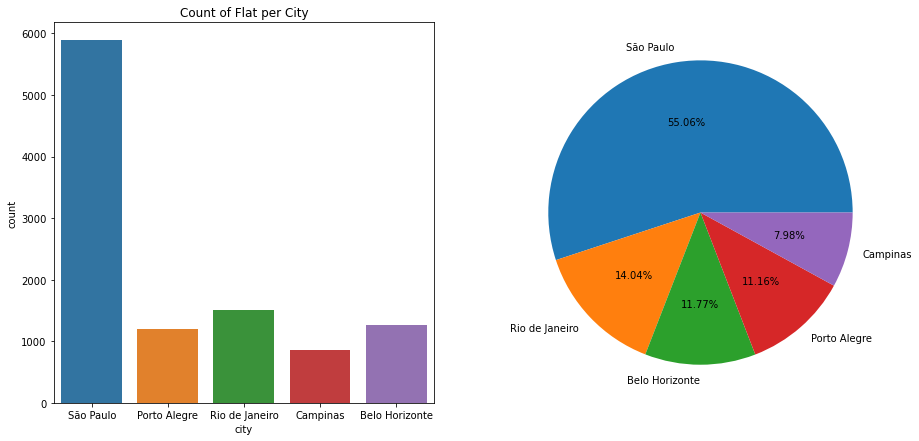

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Flat per City")                  
percentage = df["city"].value_counts()         
labels = list(df["city"].value_counts().index) 
sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()


### Interpretation: 55% of flats available in Sao Paulo

## Analysis of Rooms

In [19]:
info_of_cat("rooms")

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0


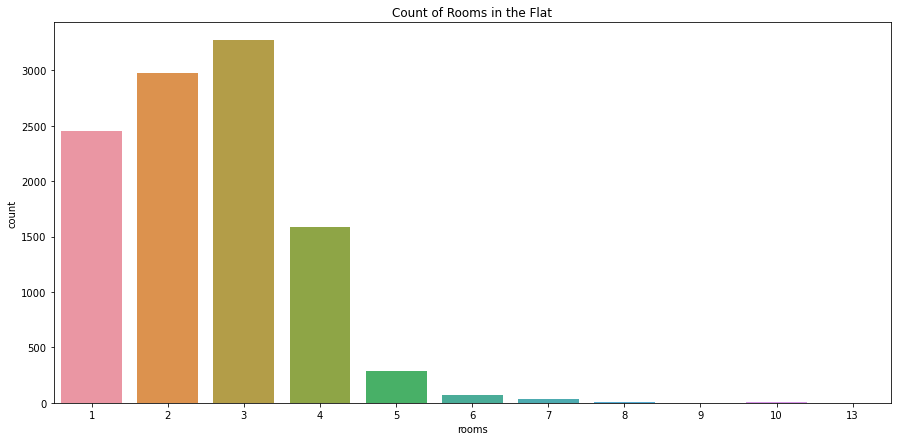

In [18]:
fig, ax = plt.subplots(figsize = (15, 7))
plt.title("Count of Rooms in the Flat")                  
sns.countplot(x = df["rooms"])
plt.show()


### Interpretation: Flats with 3 or 2 rooms are available more.

## Analysis of Bathroom

In [22]:
info_of_cat("bathroom")

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


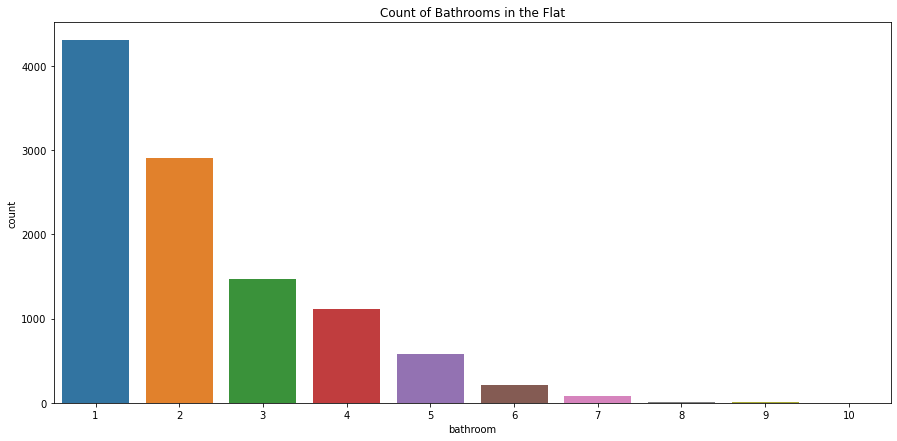

In [23]:
fig, ax = plt.subplots(figsize = (15, 7))
plt.title("Count of Bathrooms in the Flat")                  
sns.countplot(x = df["bathroom"])
plt.show()


### Interpretation: Flats with only one bathroom is available more.

## Analysis of Parking Spaces

In [24]:
info_of_cat("parking spaces")

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


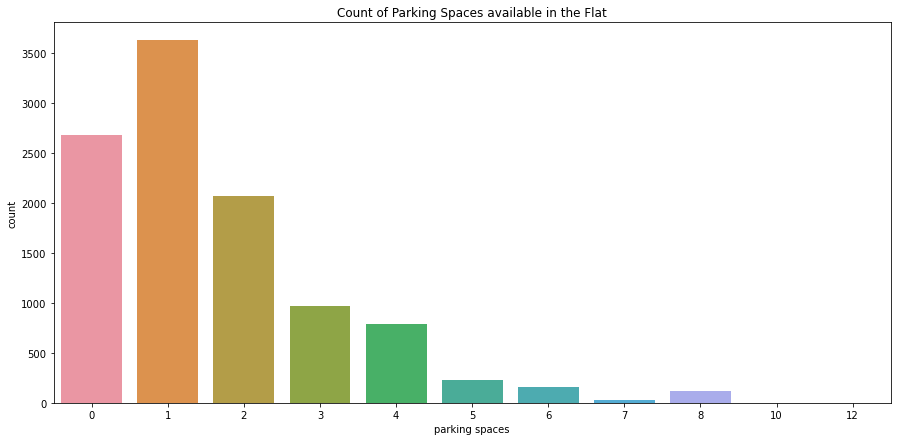

In [25]:
fig, ax = plt.subplots(figsize = (15, 7))
plt.title("Count of Parking Spaces available in the Flat")                  
sns.countplot(x = df["parking spaces"])
plt.show()


### Interpretation: Flats with one Parking Space is available more.

## Analysis of Animal

In [26]:
info_of_cat("animal")

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


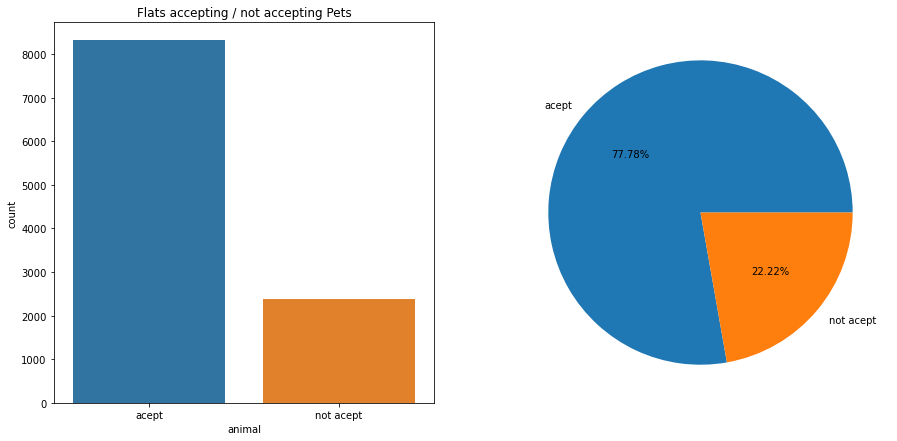

In [29]:

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Flats accepting / not accepting Pets")                  
percentage = df["animal"].value_counts()         
labels = list(df["animal"].value_counts().index) 
sns.countplot(x = df["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()


### Interpretation: More than 70% of flats are accepting pet animals.

## Analysis of Furniture

In [30]:
info_of_cat("furniture")

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


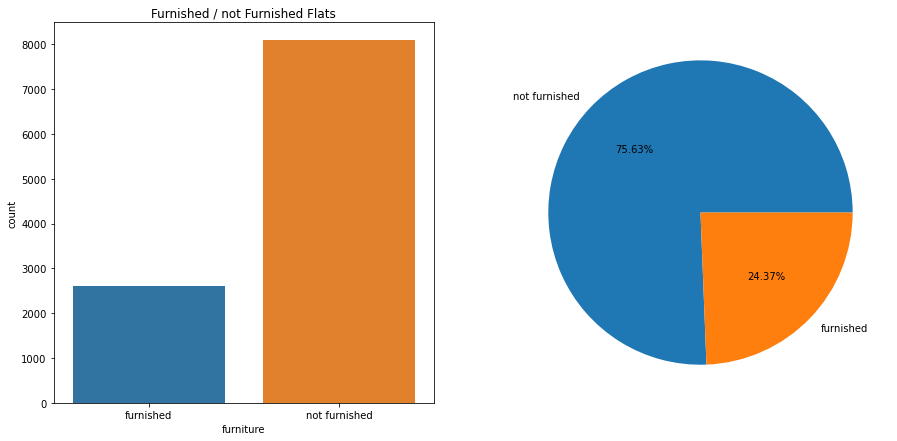

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Furnished / not Furnished Flats")                  
percentage = df["furniture"].value_counts()         
labels = list(df["furniture"].value_counts().index) 
sns.countplot(x = df["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()


### Interpretation: More than 75% flats are not furnished.

# 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 Continuous 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

### User-defined function for calculating mean, median, standard deviation, and count of all the null values

In [33]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")


### Analysis of Area

In [34]:
info_of_numerical("area")

The mean of the area is 149.21791994014217
The median of the area is 90.0
The standard deviation of the area is 537.0169423364867
Number of missing values in the area is 0


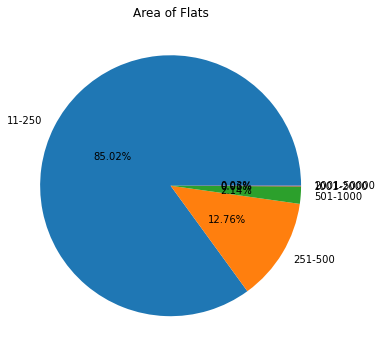

In [49]:

bins =     [11,250,500,1000,2000,50000]                                             
labels =  ["11-250", "251-500", "501-1000", "1001-2000","2001-50000"]                   
data = pd.cut(df["area"], bins = bins, labels = labels)
data = data.value_counts()                                                      
fig, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,labels=data.index, pctdistance = 0.5,autopct="%.2f%%",labeldistance=1.1) 

plt.title("Area of Flats")
plt.show()

### Interpretation: More than 85% of flats are having area ranging from 11 to 250. Very less number of flats are having more area.

### Analysis of Floor

In [50]:
info_of_numerical("floor")

The mean of the floor is 5.0679947624392065
The median of the floor is 3.0
The standard deviation of the floor is 6.069050243218268
Number of missing values in the floor is 0


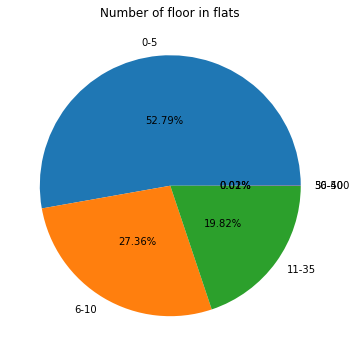

In [52]:
                                          
bins =     [0,5,10,35,50,400]                                             
labels =  ["0-5", "6-10", "11-35", "36-50","50-400"]                   
data = pd.cut(df["floor"], bins = bins, labels = labels)
data = data.value_counts()                                                      
fig, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,labels=data.index, pctdistance = 0.5,autopct="%.2f%%",labeldistance=1.1) 

plt.title("Number of floor in flats")
plt.show()

#### Fuction to calculate the percentage of bar value

In [83]:
def createValOnBar(ax):
    for bar in ax.patches:                                      
        percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"          
        x = bar.get_x() + bar.get_width() /2                            
        y = bar.get_height()                                          
        plt.text(x,y, str(percentage), ha ="center" )   
    plt.show()

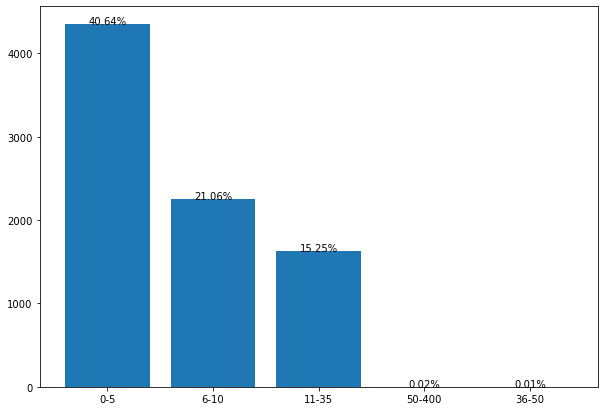

In [86]:
                                          
bins =     [0,5,10,35,50,400]                                             
labels =  ["0-5", "6-10", "11-35", "36-50","50-400"]                   
data = pd.cut(df["floor"], bins = bins, labels = labels)
val=data.value_counts().values
data_cnt = data.value_counts()
label=data_cnt.index

fig,ax=plt.subplots(figsize=(10,7))
ax=plt.bar(label,val)
createValOnBar(ax)

### Interpretation: More than 50% of flats are having 5 or less floors.

### Analysis of HOA

In [53]:
info_of_numerical("hoa (R$)")

The mean of the hoa (R$) is 1174.0216984661429
The median of the hoa (R$) is 560.0
The standard deviation of the hoa (R$) is 15592.305248403356
Number of missing values in the hoa (R$) is 0


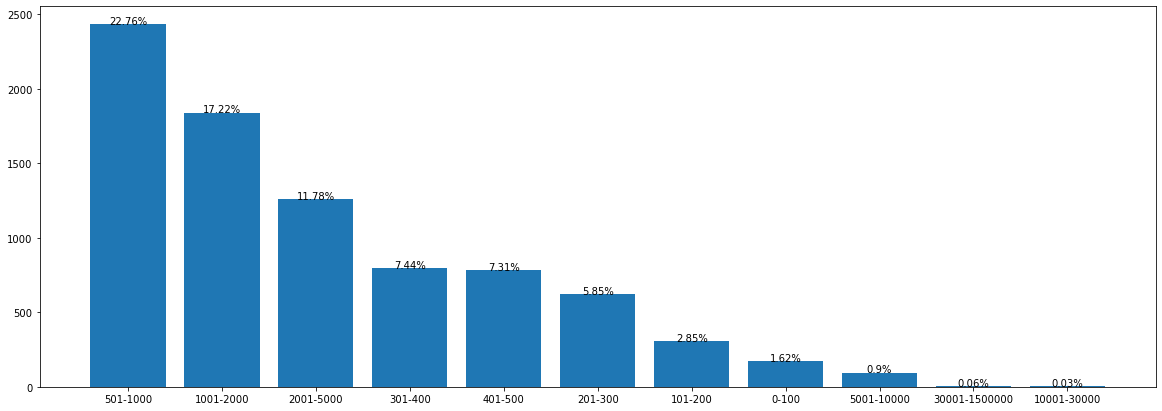

In [90]:
bins =     [0,100,200,300,400,500,1000,2000,5000,10000,30000,1500000]                                             
labels =  ["0-100","101-200","201-300","301-400","401-500", "501-1000", "1001-2000", "2001-5000","5001-10000","10001-30000","30001-1500000"]                   
data = pd.cut(df["hoa (R$)"], bins = bins, labels = labels)
val=data.value_counts().values
data_cnt = data.value_counts()
label=data_cnt.index

fig,ax=plt.subplots(figsize=(20,7))
ax=plt.bar(label,val)
createValOnBar(ax)

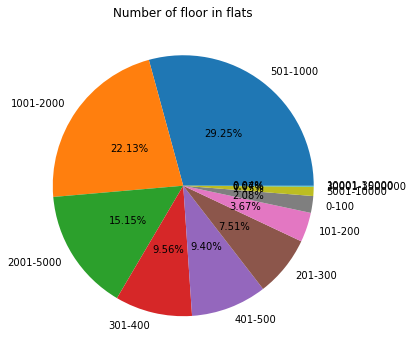

In [91]:
bins =     [0,100,200,300,400,500,1000,2000,5000,10000,30000,1500000]                                             
labels =  ["0-100","101-200","201-300","301-400","401-500", "501-1000", "1001-2000", "2001-5000","5001-10000","10001-30000","30001-1500000"]                                          
                
data = pd.cut(df["hoa (R$)"], bins = bins, labels = labels)
data = data.value_counts()                                                      
fig, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,labels=data.index, pctdistance = 0.5,autopct="%.2f%%",labeldistance=1.1) 

plt.title("HOA")
plt.show()

### Interpretation: 23% of flats are having HOA ranging from 501 to 1000.

### Analysis of Rent Amount

In [92]:
info_of_numerical("rent amount (R$)")

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The standard deviation of the rent amount (R$) is 3408.5455176710816
Number of missing values in the rent amount (R$) is 0


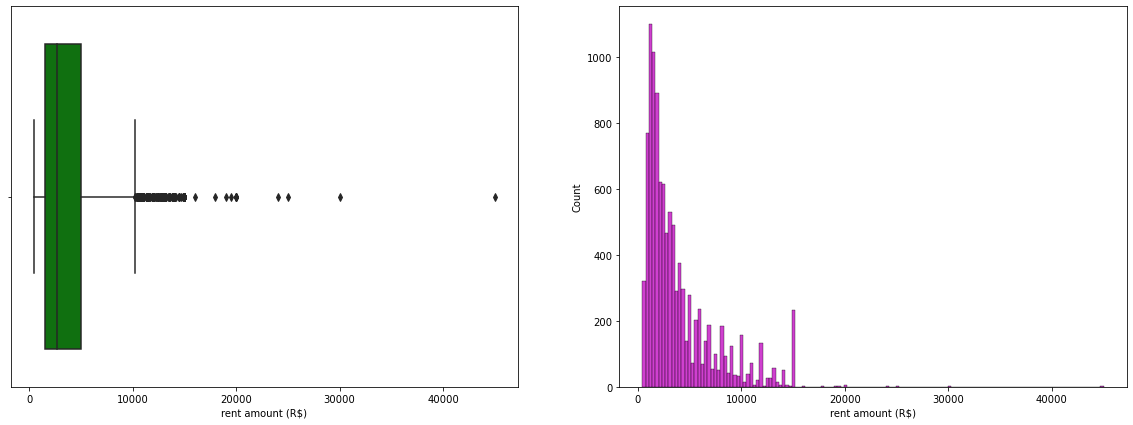

In [93]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["rent amount (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = df["rent amount (R$)"], ax = ax[0], color = "g") 
plt.show()

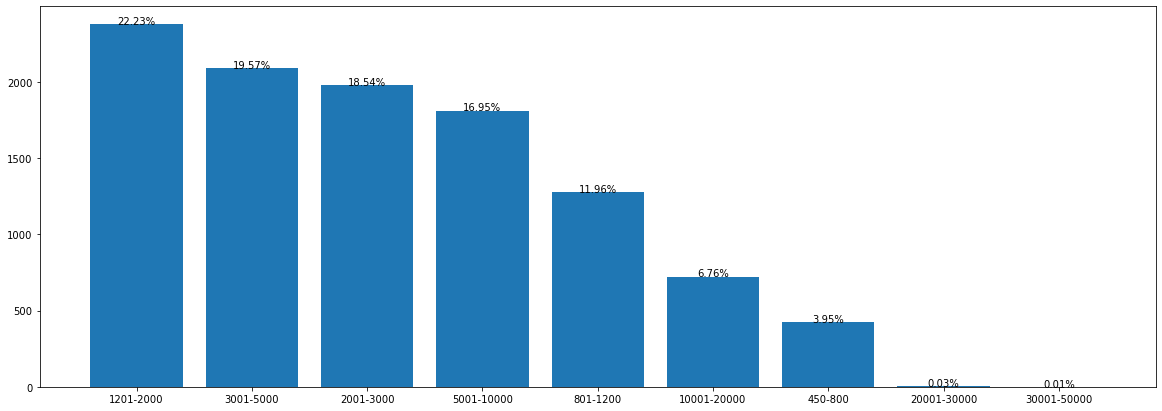

In [94]:
bins =     [450,800,1200,2000,3000,5000,10000,20000,30000,50000]                                             
labels =  ["450-800","801-1200","1201-2000","2001-3000","3001-5000","5001-10000","10001-20000","20001-30000","30001-50000"]                   
data = pd.cut(df["rent amount (R$)"], bins = bins, labels = labels)
val=data.value_counts().values
data_cnt = data.value_counts()
label=data_cnt.index

fig,ax=plt.subplots(figsize=(20,7))
ax=plt.bar(label,val)
createValOnBar(ax)

### Interpretation: 22% of flats are having rent ranging from 1201 to 2000.

## Level 2 Analysis

## CAT-CAT Analysis

### Analysis of rooms (1 to 5) available per flat in each City

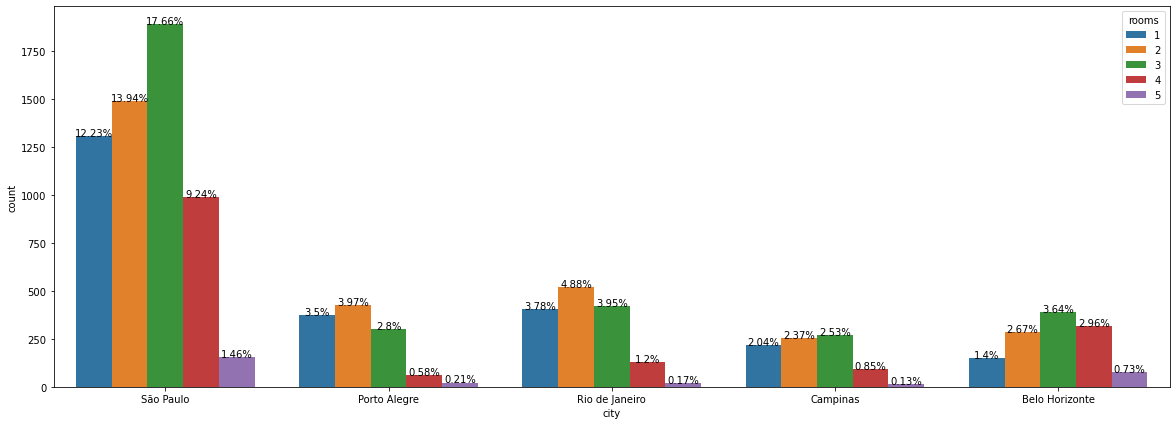

In [8]:
data=df[(df['rooms']>=1) & (df['rooms']<=5)]
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "city", hue = "rooms", data = data)
createValOnBar(ax)


### Interpretation: Sao Paulo,Campinas and Belo Horizonte cities have more flats with 3 rooms, whereas Porto Alegre and Rio de Janeiro has flats with 2 rooms.

### Analysis of bathrooms (1 to 7) available per flat in each City

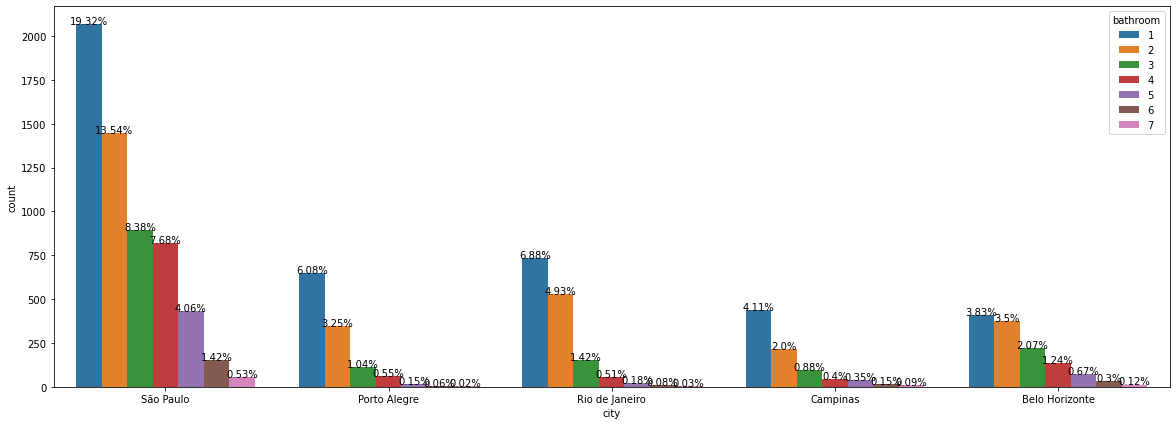

In [11]:
data=df[(df['bathroom']>=1) & (df['bathroom']<=7)]
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "city", hue = "bathroom", data = data)
createValOnBar(ax)

### Interpretation: All the 5 cities are having more number of flats with one bathroom.

### Analysis of Parking Space (0 to 5) available per flat in each City

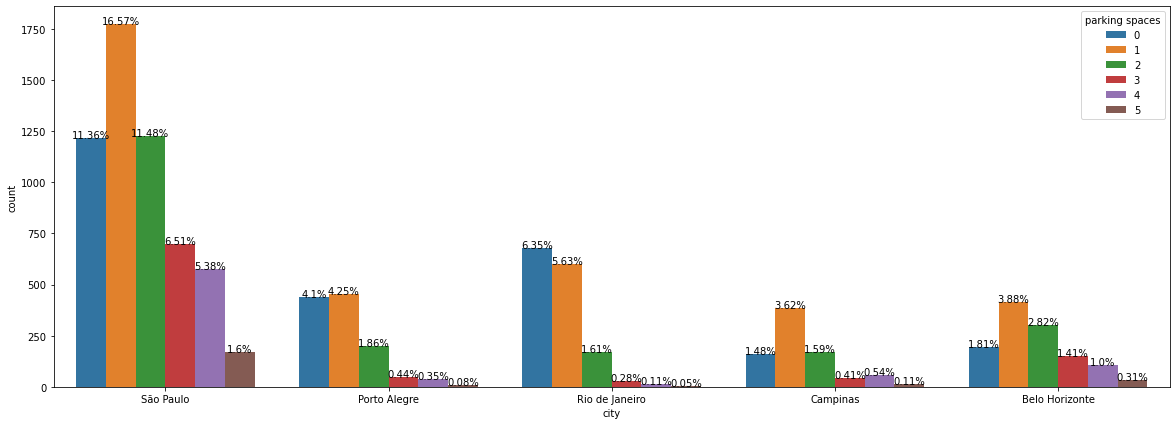

In [12]:
data=df[(df['parking spaces']>=0) & (df['parking spaces']<=5)]
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "city", hue = "parking spaces", data = data)
createValOnBar(ax)

### Interpretation: Most of the cities have 0 or 1 number of parking space. And Sao Paulo has more number of flats with only one parking space.

### Analysis of Pet animals allowed in flat in each City

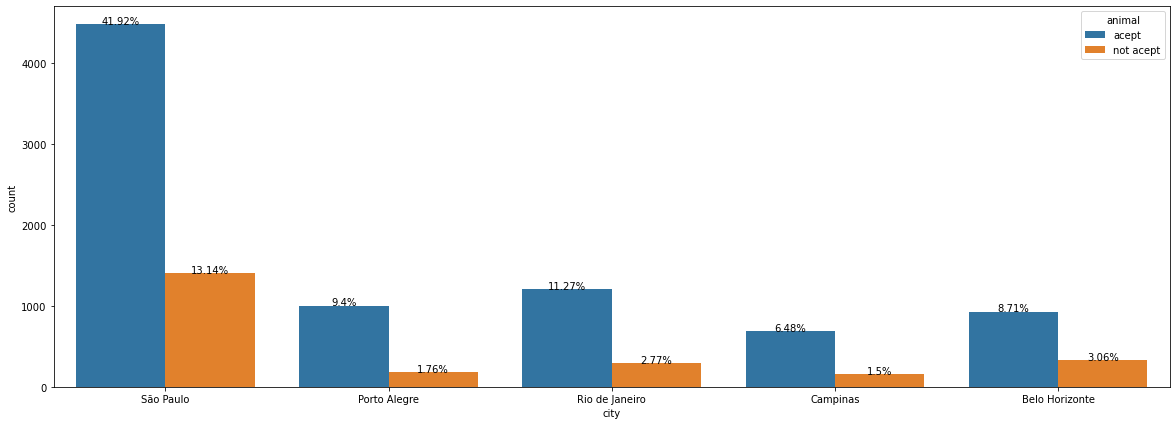

In [13]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "city", hue = "animal", data = df)
createValOnBar(ax)

### Interpretation: All the cities having more flats which are allowing Pet animals.

### Analysis of funished/not furnished flats in each city

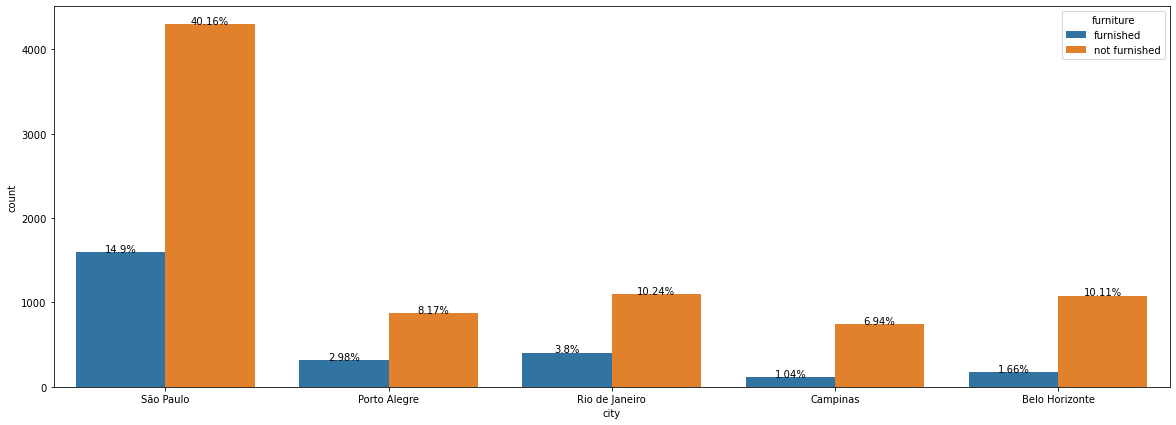

In [14]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "city", hue = "furniture", data = df)
createValOnBar(ax)

### Interpretation: Most of the flats are not furnished in all the cities. Sao Paulo has more number of furnished flats.

## Category to Continuous variable Analysis

### Analysis of area of available flat in each city

<AxesSubplot:xlabel='area', ylabel='count'>

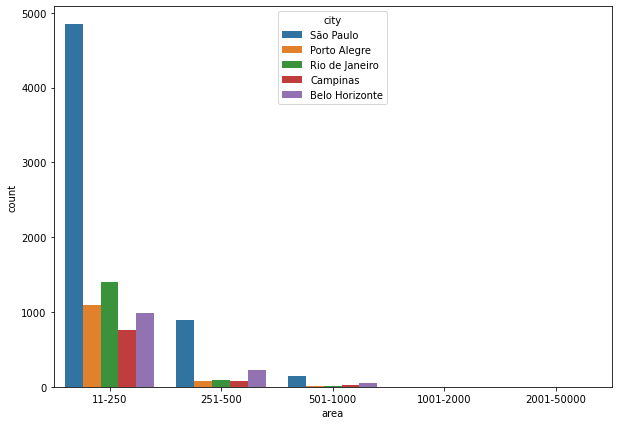

In [24]:
bins =     [11,250,500,1000,2000,50000]                                             
labels =  ["11-250", "251-500", "501-1000", "1001-2000","2001-50000"]                   
data = pd.cut(df["area"], bins = bins, labels = labels)

fig,ax=plt.subplots(figsize=(10,7))
sns.countplot(x=data,hue=df['city'])


### Interpretation: Sao Paulo has more flats with less area ranging from 11 to 250. All the cities are having flats within this range.

### Analysis of floor in flats per city

<AxesSubplot:xlabel='floor', ylabel='count'>

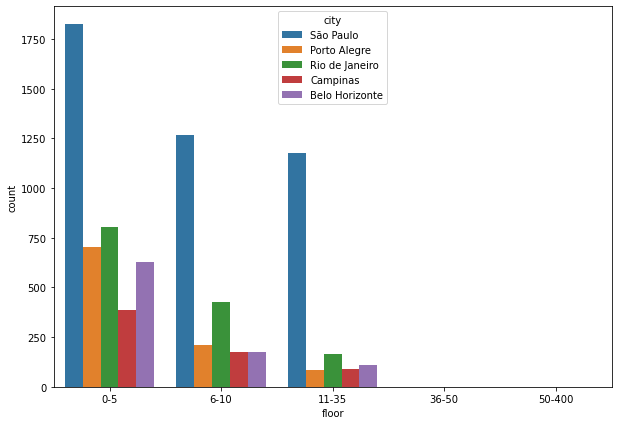

In [25]:
bins =     [0,5,10,35,50,400]                                             
labels =  ["0-5", "6-10", "11-35", "36-50","50-400"]                   
data = pd.cut(df["floor"], bins = bins, labels = labels)

fig,ax=plt.subplots(figsize=(10,7))
sns.countplot(x=data,hue=df['city'])

### Interpretation: All the cities having flats from 0 to 35 floors. Sao Paulo has more flats with 0 to 5 floors.

### Analysis of HOA range in city

<AxesSubplot:xlabel='hoa (R$)', ylabel='count'>

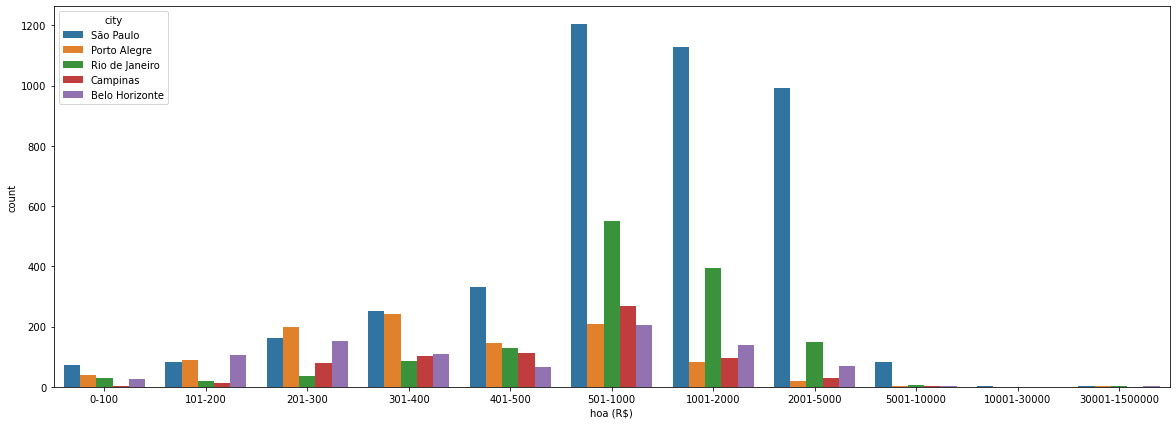

In [27]:
bins =     [0,100,200,300,400,500,1000,2000,5000,10000,30000,1500000]                                             
labels =  ["0-100","101-200","201-300","301-400","401-500", "501-1000", "1001-2000", "2001-5000","5001-10000","10001-30000","30001-1500000"]                                          
data = pd.cut(df["hoa (R$)"], bins = bins, labels = labels)

fig,ax=plt.subplots(figsize=(20,7))
sns.countplot(x=data,hue=df['city'])

### Interpretation: More number of flats are having HOA ranging from 501 to 1000 and San Paulo has more number of flats with that range.

### Analysis of Rent range in each city

<AxesSubplot:xlabel='rent amount (R$)', ylabel='count'>

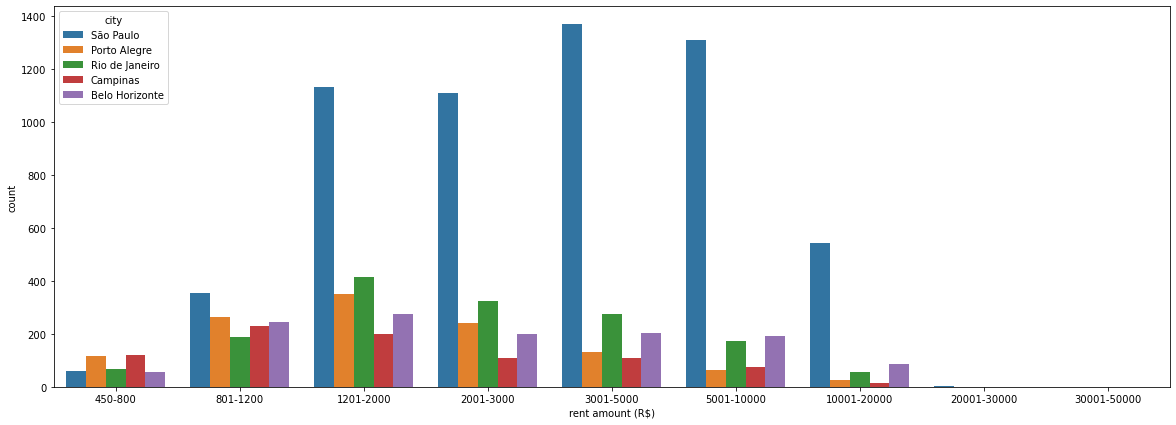

In [28]:
bins =     [450,800,1200,2000,3000,5000,10000,20000,30000,50000]                                             
labels =  ["450-800","801-1200","1201-2000","2001-3000","3001-5000","5001-10000","10001-20000","20001-30000","30001-50000"]                   
data = pd.cut(df["rent amount (R$)"], bins = bins, labels = labels)

fig,ax=plt.subplots(figsize=(20,7))
sns.countplot(x=data,hue=df['city'])

### Interpretation: More number of flats available between the rent 1201 to 5000. Again Sao Paulo has more flats within this range.

# Level 3 Analysis:

## Multivariant Analysis

### Flats with less or equal to 5 rooms and bathrooms atleast 1 and atlease one parking space and furnished or not furnished in each city.

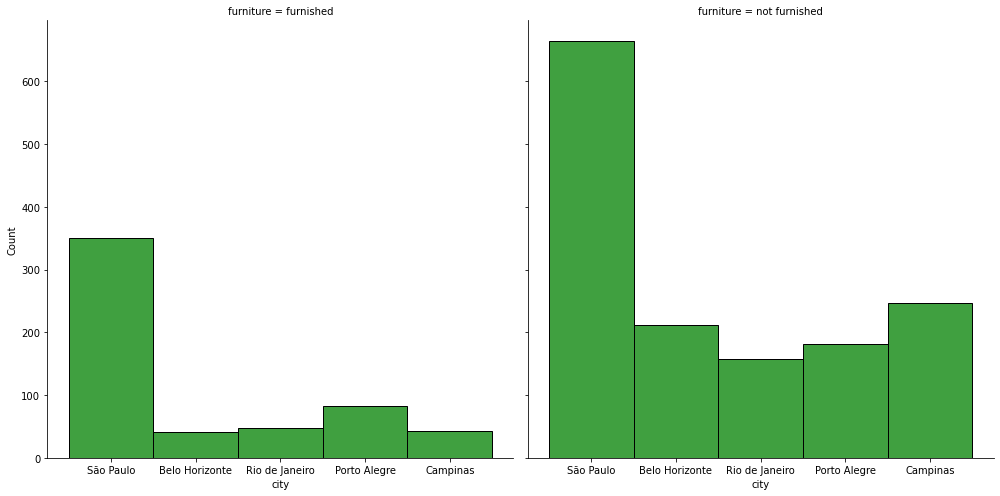

In [36]:
data=df[(df['rooms']>=1) & (df['rooms']<=5) & (df['bathroom']==1) & (df['parking spaces']==1)]

#fig, ax = plt.subplots(figsize = (20, 7))
g = sns.FacetGrid(data, col = "furniture", height = 7)
g.map(sns.histplot, "city",color='g')
plt.show()



### Interpretation: Sao Paulo has more furnished / not furnished flats with less than 6 rooms, one bathroom, one parking space.

### Rent amount range between 1201 and 5000, hoa range between 501 to 5000, area 11 to 250 in each city

C:\Users\RamMahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

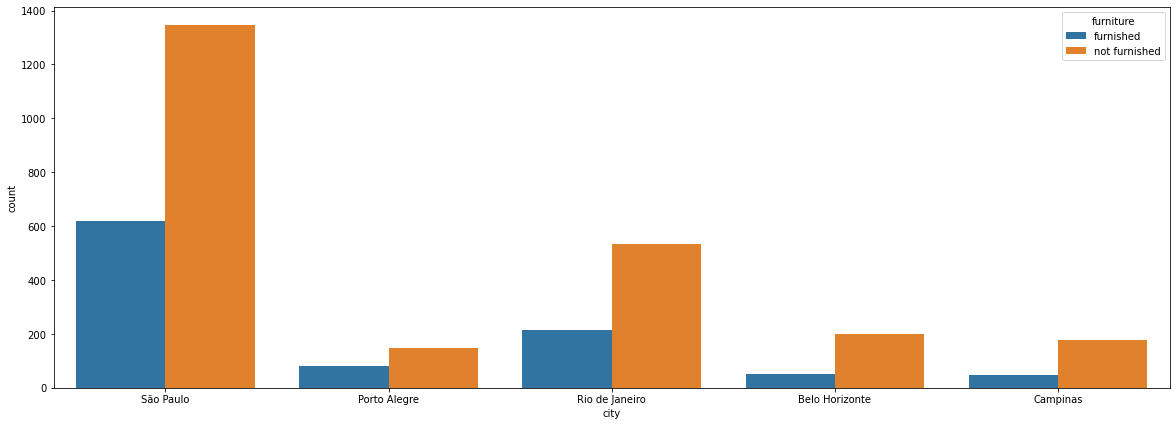

In [38]:
data=df[(df['rent amount (R$)']>=1201) & (df['rent amount (R$)']<=5000) & 
       (df['hoa (R$)'] >=501) & (df['hoa (R$)']<=5000) & (df['area']>=11) & (df['area']<=250)]

fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(data['city'],hue=data['furniture'])

### Interpretation: Sao Paulo has more flats with the rent ranging between 1201 and 5000, hoa range between 501 to 5000, area 11 to 250

### Rent amount range between 1201 and 5000, hoa range between 501 to 5000, area 11 to 250 in each city and rooms less than 4 and 1 bathroom and 1 parking space.

C:\Users\RamMahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

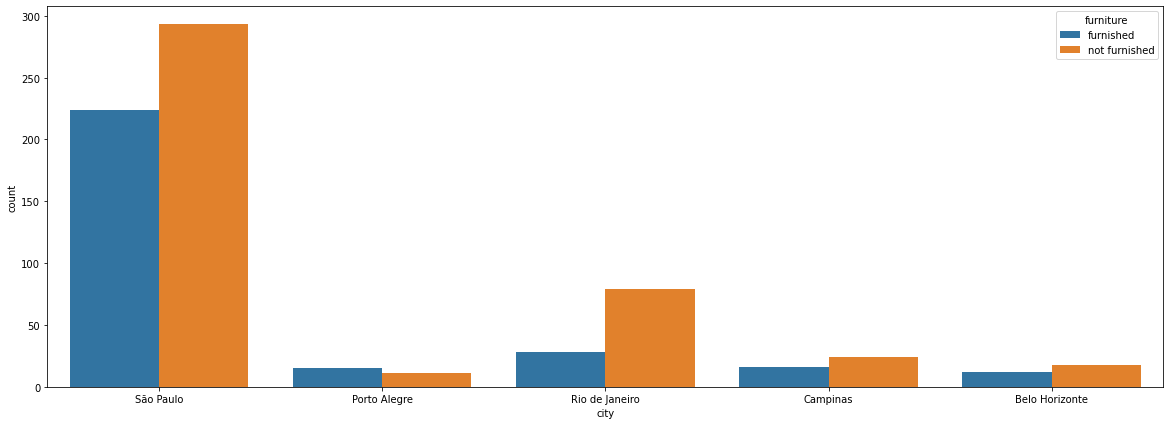

In [39]:
data=df[(df['rent amount (R$)']>=1201) & (df['rent amount (R$)']<=5000) & 
       (df['hoa (R$)'] >=501) & (df['hoa (R$)']<=5000) & (df['area']>=11) & (df['area']<=250) & 
       (df['rooms']<4) & (df['bathroom']==1) & (df['parking spaces']==1)]

fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(data['city'],hue=data['furniture'])

### Interpretation: San Paulo has more number of affordable flats.

### Rent amount range between 1201 and 5000, hoa range between 501 to 5000, area 11 to 250 in each city and  4 or 5 rooms  and 1 bathroom and 1 parking space.

C:\Users\RamMahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

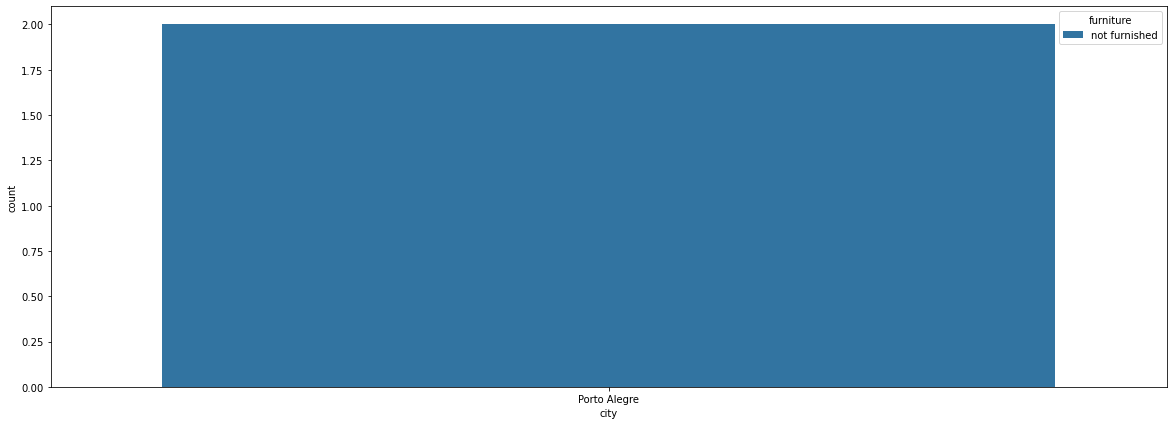

In [40]:
data=df[(df['rent amount (R$)']>=1201) & (df['rent amount (R$)']<=5000) & 
       (df['hoa (R$)'] >=501) & (df['hoa (R$)']<=5000) & (df['area']>=11) & (df['area']<=250) & 
       (df['rooms']>=4) & (df['rooms']<=5) & (df['bathroom']==1) & (df['parking spaces']==1)]

fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(data['city'],hue=data['furniture'])

### Interpretation: Only Porto Alegre has affordable flat with 4 or 5 rooms.

### Less Rent : Rent amount range between 450 and 1200, hoa is less than 500, area 11 to 250 in each city and 1 or 2 rooms and 1 bathroom and 1 parking space

C:\Users\RamMahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

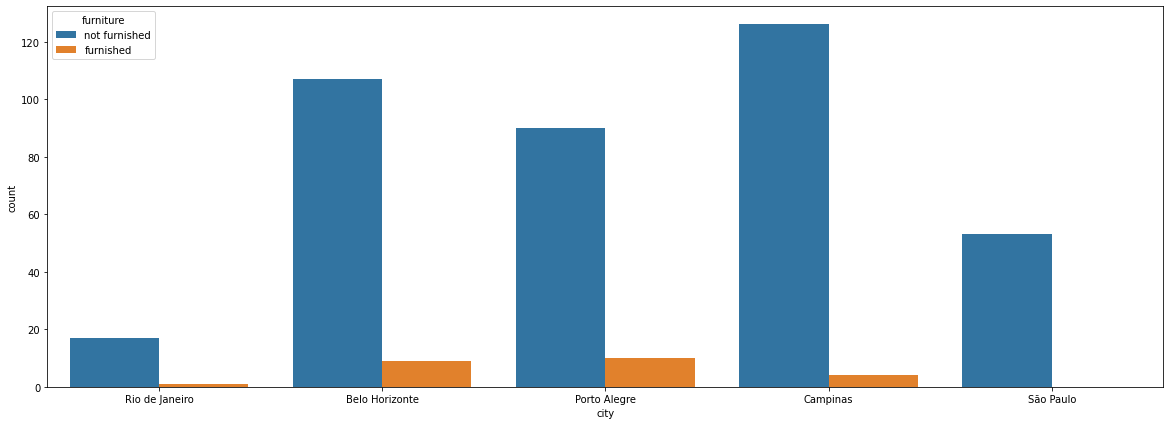

In [48]:
data=df[(df['rent amount (R$)']>=450) & (df['rent amount (R$)']<=1200) & 
       (df['hoa (R$)'] <=500) & (df['area']>=11) & (df['area']<=250) & 
       (df['rooms']>=1) & (df['rooms']<=2) & (df['bathroom']==1) & (df['parking spaces']==1)]

fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(data['city'],hue=data['furniture'])

### Analysis: 

Sao Paulo has more number of flats with rent ranging between 1201 and 5000, hoa range between 501 to 5000, area 11 to 250 in each city and less than 4 rooms and 1 bathroom and 1 parking space.
Next choice for the above condition is Rio de Janeiro.

If more number of rooms (4 or 5 rooms) required then Porto Alegre city has some flats.(Not furnished)

Campinas has more flats with Rent amount range between 450 and 1200, hoa is less than 500, area 11 to 250 in each city and 1 or 2 rooms and 1 bathroom and 1 parking space.

So if people want to relocate from Sao Paulo because of rent, then they can choose flats from Campinas, which has more flats with less rent.